# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
# Importing the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data from CSV file
original_data = pd.read_csv("/content/drive/MyDrive/Python - Google Colab/7. Model Deployment/Project - SuperKart/SuperKart.csv")

In [ ]:
# Creating a copy of the dataset to manipulate and use it in the model
data = original_data.copy()

# **Data Overview**

In [ ]:
# Checking the number of rows and columns in the training data
data.shape

(8763, 12)

**Observation**: There are 8763 rows and 12 columns in the dataset.

In [ ]:
# Viewing the first 5 rows of the data
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
# Viewing the last 5 rows of the data
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


In [ ]:
# Viewing the count and data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observation**: There are no null values in the dataset.

There are 5 numeric columns - Prduct weight, Allocated Area, MRP, Establishment Year and Total Sales. Rest of the columns are Categorical Columns.

In [ ]:
# Checking for duplicate values in the dataset
data.duplicated().sum()

np.int64(0)

**Observation**: There are no duplicate values in the dataset.

In [ ]:
# Statistical Summary of the entire dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Statistical Summary of the numeric values in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


**Observation**:

* **Total Sales** of a product varies between 33 to 8000 with average sales being 3464 bucks.
* **MRP** of each product varies between 31 to 266 bucks and average MRP being 147 bucks.
* Product **weight** is between 4 to 22.
* Stores have been **established** between 1987 to 2009.
* Product **Allocated area** of each product lies between 0.4% to 29.8% of the total display area.







In [ ]:
# Checking the number of unique values in each column
data.nunique()

,0
Product_Id,8763
Product_Weight,1113
Product_Sugar_Content,4
Product_Allocated_Area,228
Product_Type,16
Product_MRP,6100
Store_Id,4
Store_Establishment_Year,4
Store_Size,3
Store_Location_City_Type,3


**Observation**: Above table shows the number of unique values in each column meaning there are 4 kinds of Store Ids and each Product ID is unique.

Also there are 3 different Store sizes, 4 Store types and 3 Store Location City Types.

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [ ]:
cat_cols=data.select_dtypes(include='object').columns.tolist()        # defining the list of categorical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()     # defining the list of numerical columns
print("Categorical Variables:",cat_cols)
print("Numerical Variables:",num_cols)

Categorical Variables: ['Product_Id', 'Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']
Numerical Variables: ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year', 'Product_Store_Sales_Total']


In [ ]:
cat_cols.remove('Product_Id')                                         # Removing the column 'Product ID' from list of Categorical values as it is unique for each row and doesnt share any insight for EDA

In [ ]:
cat_cols                                                              # Viewing the list of categorical columns to check 'Product ID' has been removed

['Product_Sugar_Content',
 'Product_Type',
 'Store_Id',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type']

Product_Weight 
 Skewness: 0.017514170159077292


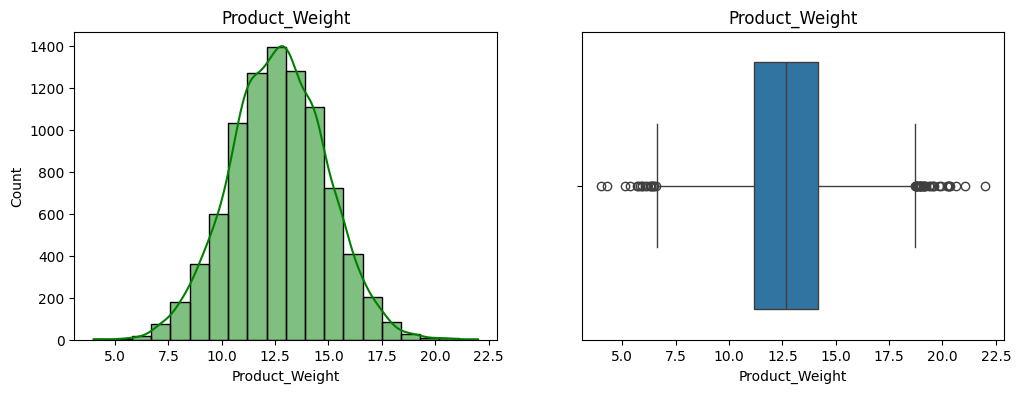

Product_Allocated_Area 
 Skewness: 1.128093142467345


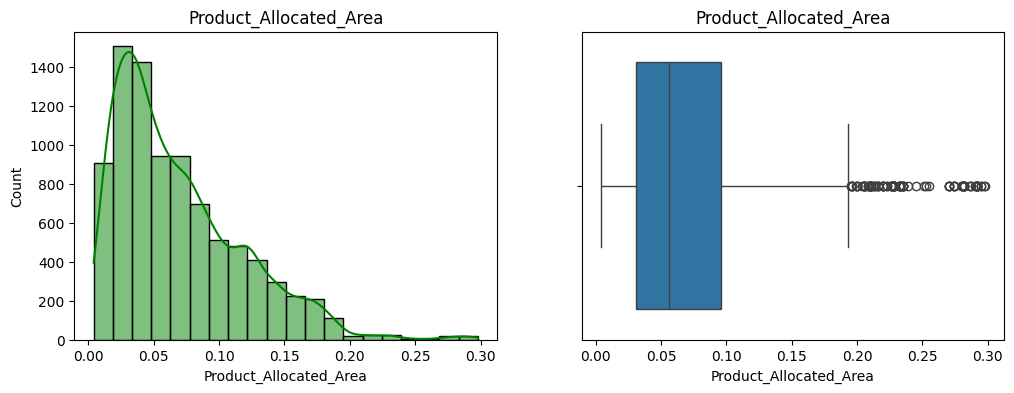

Product_MRP 
 Skewness: 0.03651300683986807


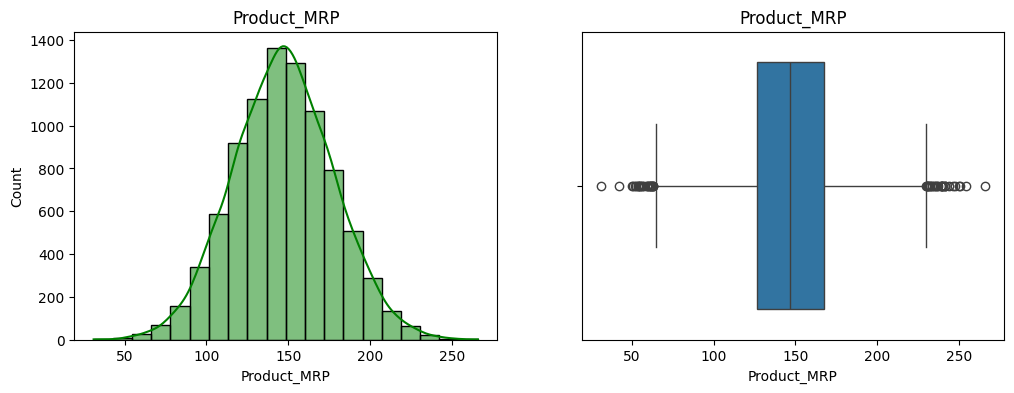

Store_Establishment_Year 
 Skewness: -0.7580613043486133


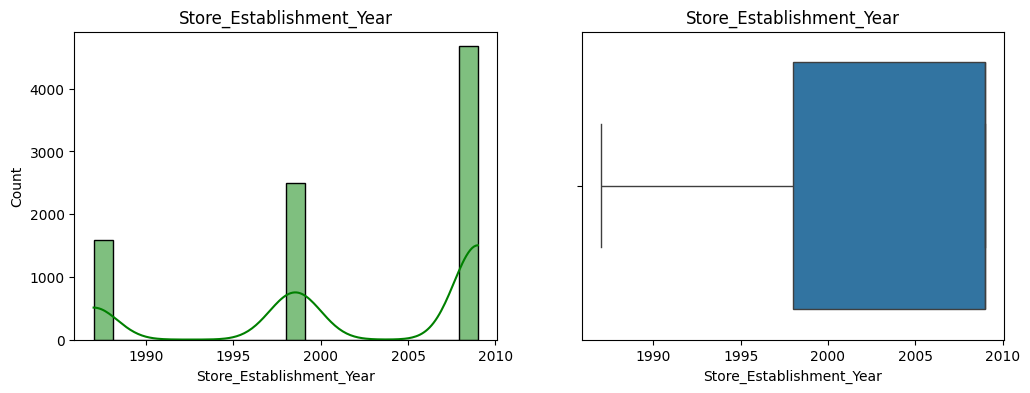

Product_Store_Sales_Total 
 Skewness: 0.09202416922487767


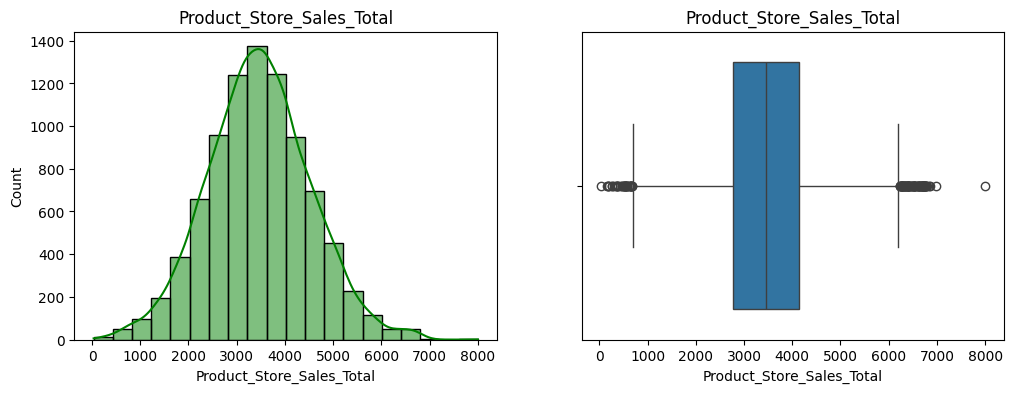

In [ ]:
for col in num_cols:                                                            # Looping through each column in the list of numerical columns to create their respective plots
  print(col, "\n","Skewness:", data[col].skew())                                # Displaying the name and skewness of each column
  plt.figure(figsize=(12,4))                                                    # Defining the figure size
  plt.subplot(1,2,1)                                                            # Creating part 1 of the subplot (left side)
  sns.histplot(data = data, x = col, kde = True, bins = 20, color='green')      # Plotting the histogram for each column
  plt.title(col)                                                                # Assigning the title as the column name
  plt.xlabel(col)                                                               # Assigning the x-axis label as the column name
  plt.ylabel('Count')                                                           # Assigning the y-axis label as count
  plt.subplot(1,2,2)                                                            # Creating part 2 of the subplot (right side)
  sns.boxplot(data=data, x=col,)                                                # Plotting the boxplot for each column
  plt.title(col)                                                                # Assigning the title as the column name
  plt.xlabel(col)                                                               # Assigning the x-axis label as the column name
  plt.show()                                                                    # To display the plots

**Observation (Numeric columns)**:

1. **Product Weight** - Distribution is close to a Normal distribution with few outliers and mean Product weight being 12.65.
2. **Product Allocated Area** - This is a positively skewed distribution with most products having a smaller display area and mean display area of 6.9% of total area. This has a lot of outliers on the right.
3. **Product MRP** - Mean MRP of a product is 147 with the graphic showing close to a normal distribution and outliers on either side. Most product MRPs are between 125 to 175 bucks.
4. **Product_Store_Sales_Total** also gives a somewhat normal distribution with outliers on either side and mean revenue of a product being 3464 bucks. For most products, Total Sales are between 2700 to 4200 bucks.

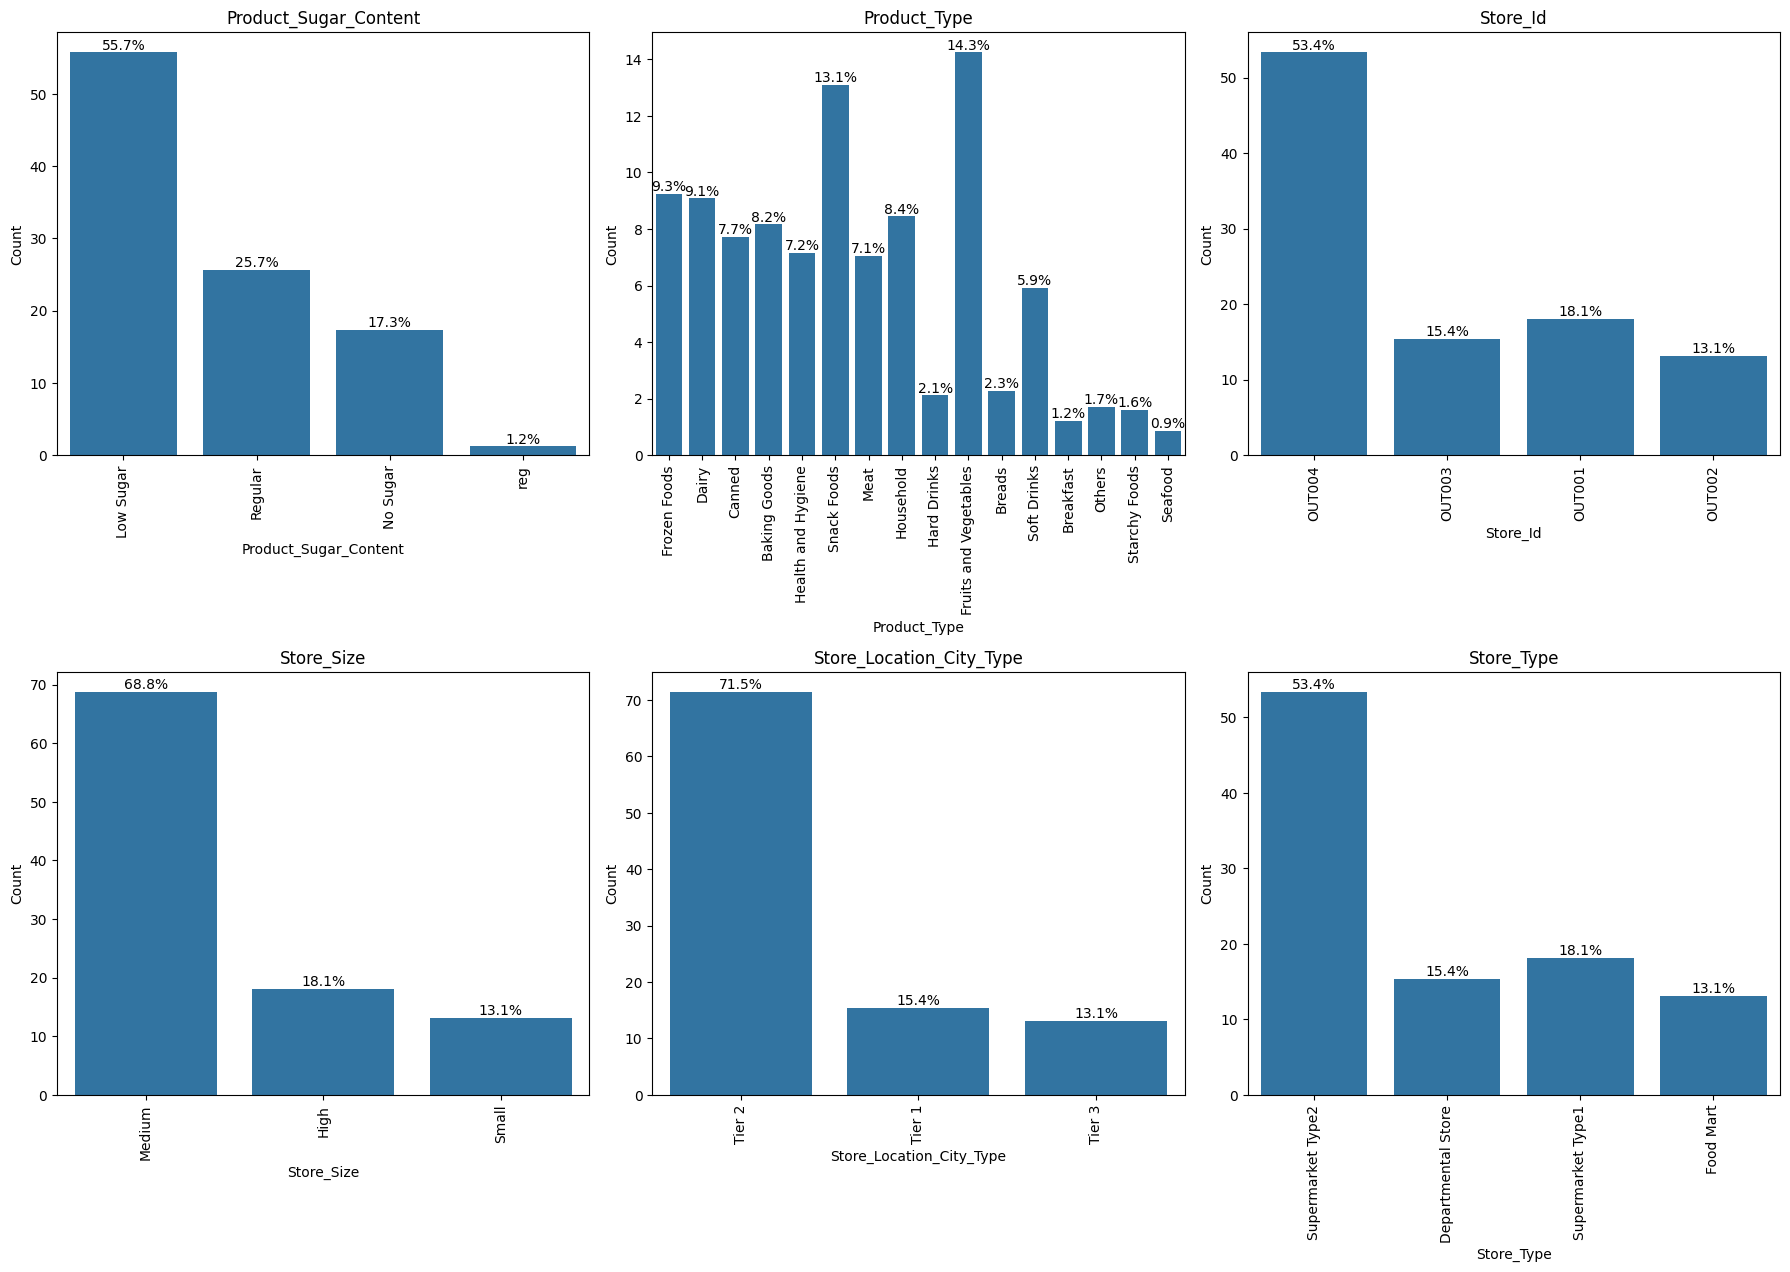

In [ ]:
plt.figure(figsize=(18, 12))                                              # Defining the figure size
for i, col in enumerate(cat_cols):                                       # plotting a countplot for each categorical column
    plt.subplot(2, 3, i + 1)                                             # Creating a subplot
    ax = sns.countplot(data = data, x = col, stat='percent')                                  # plotting the countplots
    plt.tight_layout()
    plt.title(col)                                                       # Assigning the title as the column name
    plt.xlabel(col)                                                      # Assigning the x-axis label as the column name
    plt.ylabel('Count')                                                  # Assigning the y-axis label as count
    plt.xticks(rotation=90)                                              # Rotating the x-axis labels for better visibility
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

**Observation (Categorical columns)**:

1. More than half of the Products (>55%) have **Low Sugar content** and 17% products have **no sugar** content meaning customers might prefer healthy products. Also, there might be a typo for some Regular products which have been mentioned as 'reg' and might need to be rectified.
2. Fruits & Vegetables, Snack Foods, Frozen Foods, Household and Dairy are the **top 5 products** among all stores combined.
3. **OUT004** is the most widespread type of Store ID with more than half.
4. More than two-third of the stores are **medium sized** stores.
5. 71% stores are in **Tier 2** stores.
6. **Supermarket Type 2** is the most popular Store Type with almost 54% and the rest almost similarly divided.




## Bivariate Analysis

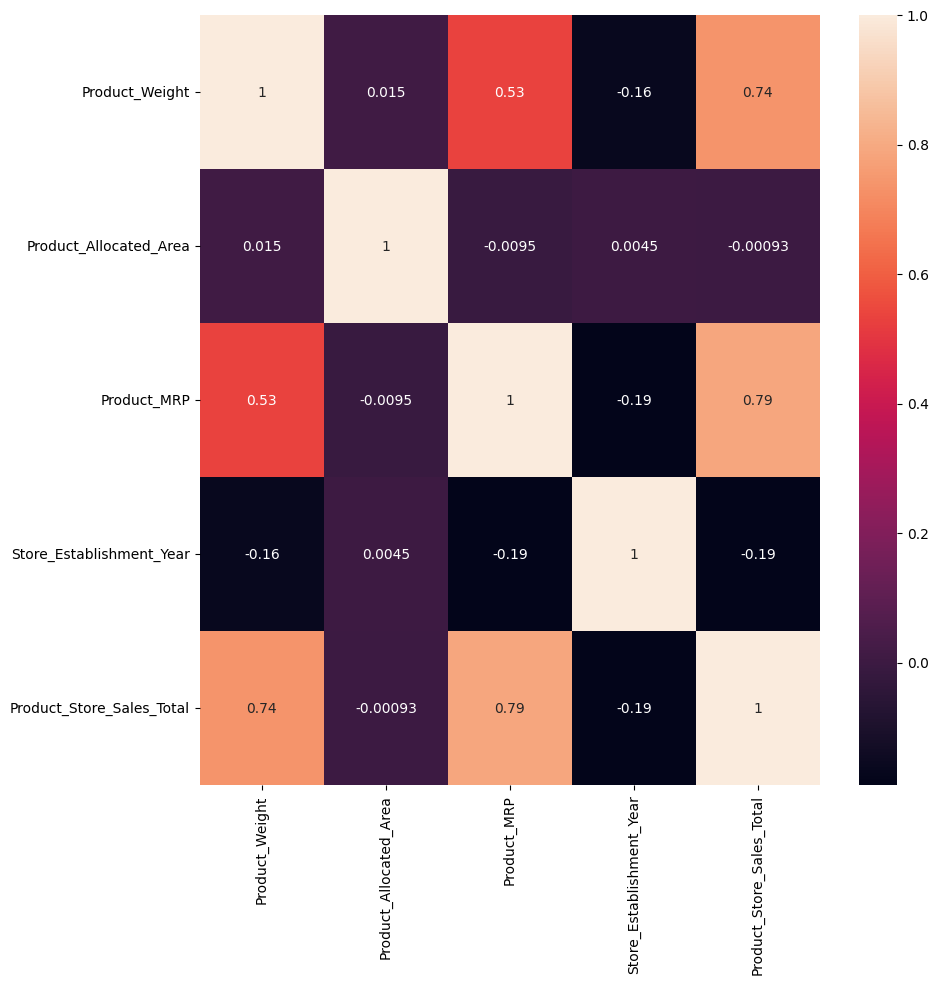

In [ ]:
# Plotting a heatmap of all the numeric columns
plt.figure(figsize=(10, 10))
# Exclude non-numeric columns before calculating correlation
sns.heatmap(data.drop(columns=cat_cols + ['Product_Id']).corr(), annot=True)
plt.show()

**Observation**:

* There seems to be a positive relationship between **Product MRP and Product Weight** which makes sense as higher the weight of a product, MRP generally would be higher.
* There is also a good coorelation between **Product Weight and Product Total Sales**.
* Similar to above there seems to be a good coorelation between **Product MRP and Product Total Sales.**
* Apart from these 3 there doesnt seem to be much correlation among other variables.







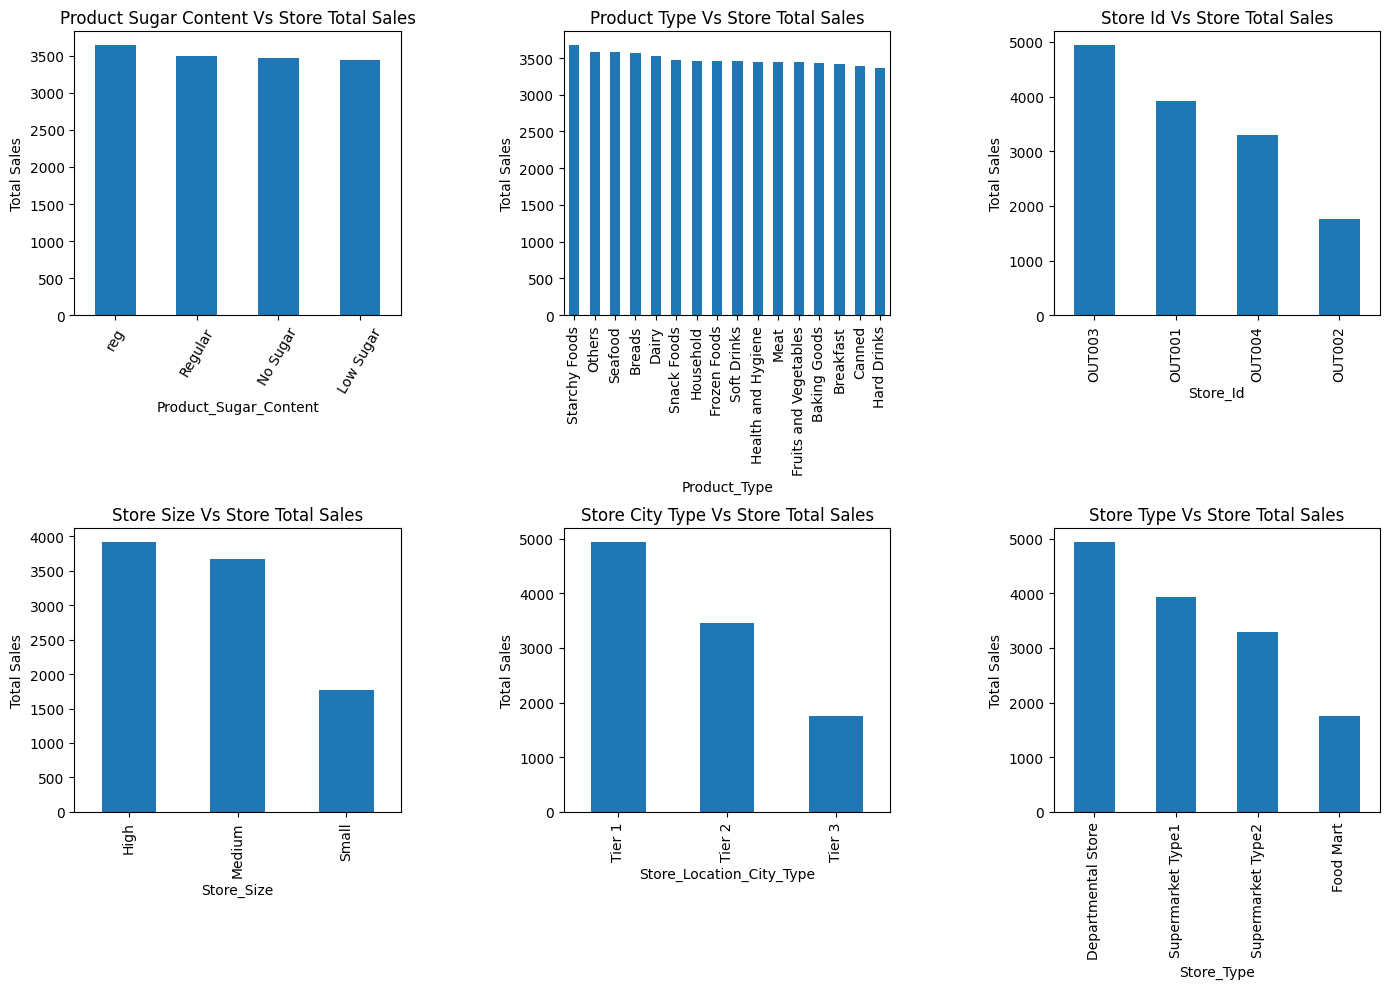

In [ ]:
# Plotting a subplot for various categorical columns vs Product Store Sales Total.
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# Plotting a barplot for Product Sugar Content Vs Product Store Total Sales in the subplot
data.groupby('Product_Sugar_Content')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).plot.bar(ax=axes[0][0])
axes[0][0].set_title("Product Sugar Content Vs Store Total Sales")
axes[0][0].tick_params(axis='x', rotation=60)
axes[0][0].set_ylabel("Total Sales")

# Plotting a barplot for Product Type Vs Product Store Total Sales in the subplot
data.groupby('Product_Type')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).plot.bar(ax=axes[0][1])
axes[0][1].set_title("Product Type Vs Store Total Sales")
axes[0][1].tick_params(axis='x', rotation=90)
axes[0][1].set_ylabel("Total Sales")

# Plotting a barplot for Store Id Vs Product Store Total Sales in the subplot
data.groupby('Store_Id')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).plot.bar(ax=axes[0][2])
axes[0][2].set_title("Store Id Vs Store Total Sales")
axes[0][2].tick_params(axis='x', rotation=90)
axes[0][2].set_ylabel("Total Sales")

# Plotting a barplot for Store Size Vs Product Store Total Sales in the subplot
data.groupby('Store_Size')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).plot.bar(ax=axes[1][0])
axes[1][0].set_title("Store Size Vs Store Total Sales")
axes[1][0].tick_params(axis='x', rotation=90)
axes[1][0].set_ylabel("Total Sales")

# Plotting a barplot for Store City Type Vs Product Store Total Sales in the subplot
data.groupby('Store_Location_City_Type')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).plot.bar(ax=axes[1][1])
axes[1][1].set_title("Store City Type Vs Store Total Sales")
axes[1][1].tick_params(axis='x', rotation=90)
axes[1][1].set_ylabel("Total Sales")

# Plotting a barplot for Store Type Vs Product Store Total Sales in the subplot
data.groupby('Store_Type')['Product_Store_Sales_Total'].mean().sort_values(ascending=False).plot.bar(ax=axes[1][2])
axes[1][2].set_title("Store Type Vs Store Total Sales")
axes[1][2].tick_params(axis='x', rotation=90)
axes[1][2].set_ylabel("Total Sales")

plt.tight_layout()
plt.subplots_adjust(hspace=.75)
plt.subplots_adjust(wspace=.5)


**Observation**:

* Products with Sugar content **'reg'** might be only 1.2% of all products but they contribute to highest average Sales among all sugar content products. **Also 'reg' might be part of 'Regular'.**
* Starchy Foods, Other foods, Seafood, Bread, Dairy earn the **highest mean revenue** in that order.
* **Store ID OUT003** earns the maximum revenue follwed by OUT001, OUT004 and least is OUT002.
* **High Store size** has highest average revenue followed by medium and small.
* **Tier 1 cities** earn maximum revenue followed by Tier 2 and then Tier 3.
* **Departmental Stores** have highest Mean Total Sales by product followed by Supermarkets and then Food Marts.




Text(0, 0.5, 'Product_Weight')

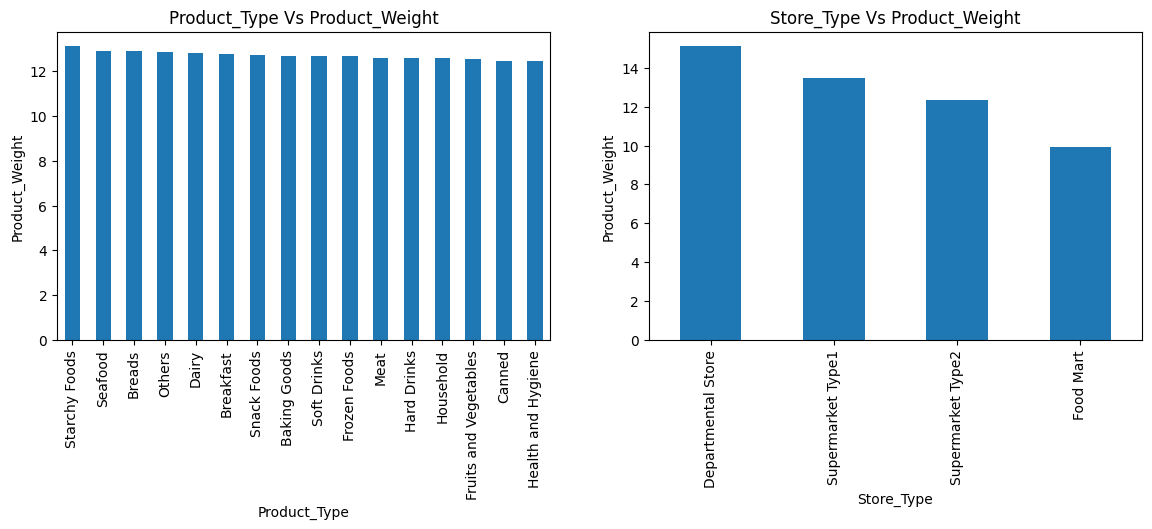

In [ ]:
# Plotting a subplot for relevant categorical columns vs Product_Weight.
fig, ax1 = plt.subplots(1, 2, figsize=(14, 4))

# Plotting a barplot for Product_Type Vs Product_Weight in the subplot
data.groupby('Product_Type')['Product_Weight'].mean().sort_values(ascending=False).plot.bar(ax=ax1[0])
ax1[0].set_title("Product_Type Vs Product_Weight")
ax1[0].tick_params(axis='x', rotation=90)
ax1[0].set_ylabel("Product_Weight")

# Plotting a barplot for Store_Type Vs Product_Weight in the subplot
data.groupby('Store_Type')['Product_Weight'].mean().sort_values(ascending=False).plot.bar(ax=ax1[1])
ax1[1].set_title("Store_Type Vs Product_Weight")
ax1[1].tick_params(axis='x', rotation=90)
ax1[1].set_ylabel("Product_Weight")

**Observations**

* Starchy Foods, Seafood, Bread, Others, Dairy have the highest Product weight among items sold and these earn the maximum revenue as well, as seen before.
* Departmental Stores have the highest weight of Product sold.




Text(0, 0.5, 'Product_Allocated_Area')

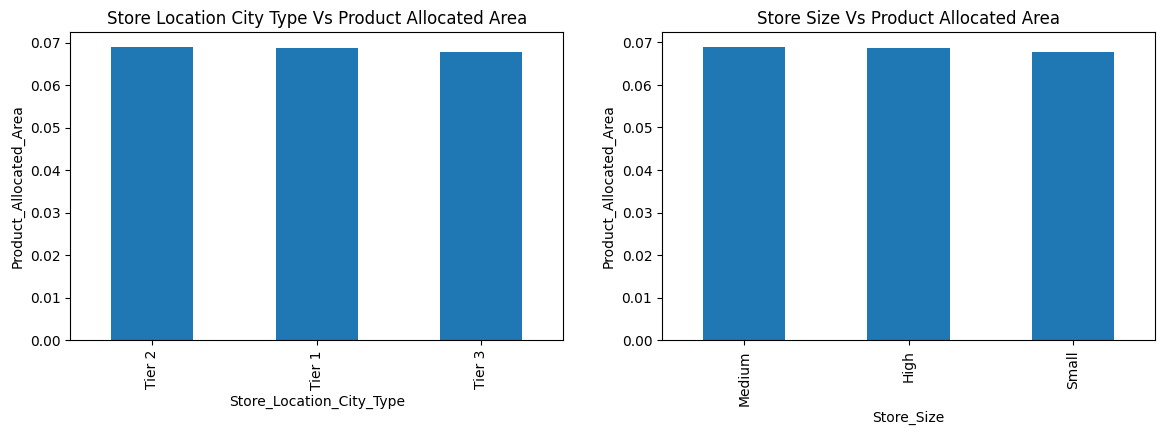

In [ ]:
# Plotting a subplot for relevant categorical columns vs Product_Allocated_Area.
fig, ax2 = plt.subplots(1, 2, figsize=(14, 4))

# Plotting a barplot for Store_Location_City_Type Vs Product_Allocated_Area in the subplot
data.groupby('Store_Location_City_Type')['Product_Allocated_Area'].mean().sort_values(ascending=False).plot.bar(ax=ax2[0])
ax2[0].set_title("Store Location City Type Vs Product Allocated Area")
ax2[0].tick_params(axis='x', rotation=90)
ax2[0].set_ylabel("Product_Allocated_Area")

# Plotting a barplot for Store_Size Vs Product_Allocated_Area in the subplot
data.groupby('Store_Size')['Product_Allocated_Area'].mean().sort_values(ascending=False).plot.bar(ax=ax2[1])
ax2[1].set_title("Store Size Vs Product Allocated Area")
ax2[1].tick_params(axis='x', rotation=90)
ax2[1].set_ylabel("Product_Allocated_Area")

**Observations**

* There **does not seem to be much differentiation** of Product Allocated Area with either Store Location City type or Store Size as all products maybe taking up similar area of the store across all types of cities.

Text(0, 0.5, 'Product_MRP')

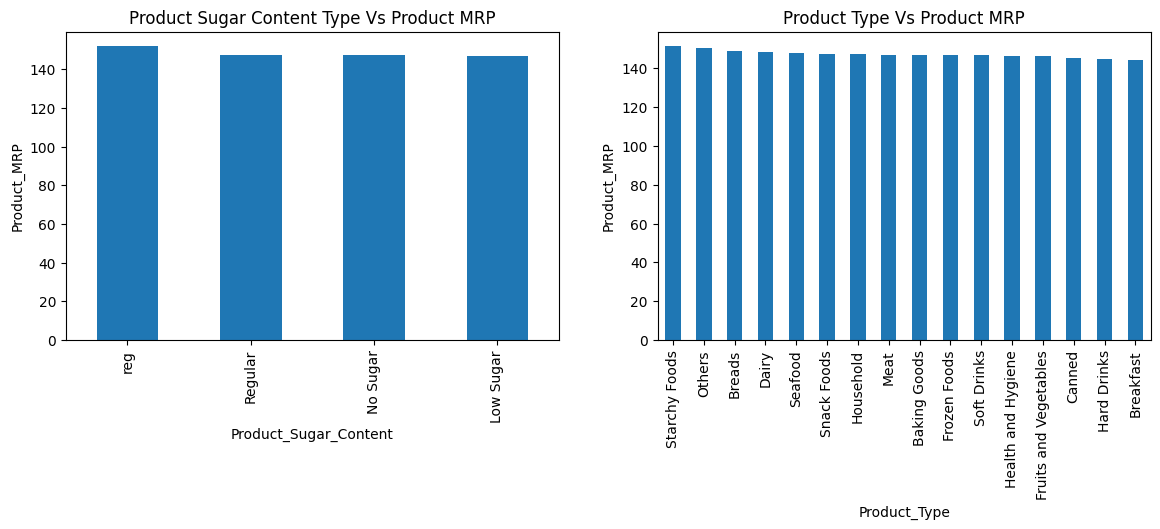

In [ ]:
# Plotting a subplot for relevant categorical columns vs Product_MRP.
fig, ax3 = plt.subplots(1, 2, figsize=(14, 4))

# Plotting a barplot for Product_Sugar_Content Vs Product_MRP in the subplot
data.groupby('Product_Sugar_Content')['Product_MRP'].mean().sort_values(ascending=False).plot.bar(ax=ax3[0])
ax3[0].set_title("Product Sugar Content Type Vs Product MRP")
ax3[0].tick_params(axis='x', rotation=90)
ax3[0].set_ylabel("Product_MRP")

# Plotting a barplot for Product_Type Vs Product_MRP in the subplot
data.groupby('Product_Type')['Product_MRP'].mean().sort_values(ascending=False).plot.bar(ax=ax3[1])
ax3[1].set_title("Product Type Vs Product MRP")
ax3[1].tick_params(axis='x', rotation=90)
ax3[1].set_ylabel("Product_MRP")

**Observations**

* **Sugar content does not seem to affect** the average Product MRP as they are more or less similar across various Product Sugar Content.
* Starchy Foods, Others, Bread, Dairy, Seafood have the **highest MRP** among all Products. They are **also sold the most** as seen earlier and hence **contribute to highest revenue** among all products.  

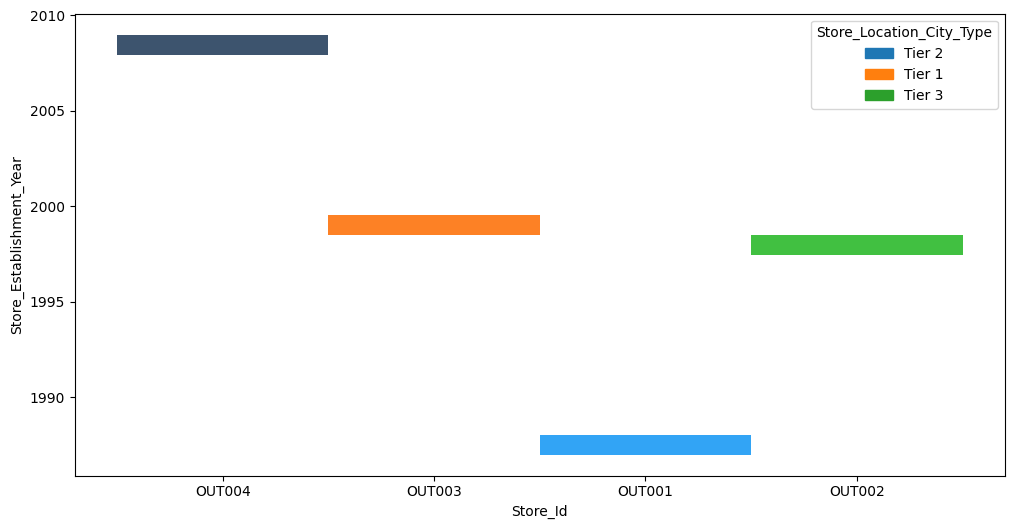

In [ ]:
# Plotting Store_Location_City_Type vs Store_Establishment_Year with hue on Store_Id.
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Store_Id', y='Store_Establishment_Year', hue='Store_Location_City_Type')
plt.show()



In [ ]:
# Create a crosstabulation of Store_Id and Store_Establishment_Year
store_establishment_crosstab = pd.crosstab(data['Store_Establishment_Year'], data['Store_Id'])

# Display the crosstabulation
display(store_establishment_crosstab)

Store_Id,OUT001,OUT002,OUT003,OUT004
Store_Establishment_Year,,,,
1987,1586,0,0,0
1998,0,1152,0,0
1999,0,0,1349,0
2009,0,0,0,4676


**Observations**
All Store IDs correspond to the year they were established on. For example,
* Store Established in **1987** has Store ID **OUT001**
* Store Established in **1998** has Store ID **OUT002**
* Store Established in **1999** has Store ID **OUT003**
* Store Established in **2009** has Store ID **OUT004**

Hence, **Store ID column can be dropped** from data as it is same as Store Established year and doesn't add any additional value.

Also **Store Establishment Year can be replaced with Age of Stores** to give a numeric value to the model in the Data Preprocessing stage.




# **Data Preprocessing**

### 1. Feature Engineering - Product ID

Although Product ID is unique for each row, the first 2 digits of the Product ID repeat for several rows and can give valuable insights to the model. Hence, we can replace Product ID with Feature Engineered Project ID containing only first 2 characters of the ID.

In [ ]:
# Extracting the first two letters of 'Product_Id'
data['Product_ID_Eng'] = data['Product_Id'].str[:2]
data['Product_ID_Eng'].value_counts()

,count
Product_ID_Eng,
FD,6539
NC,1519
DR,705


In [ ]:
# Removing the 'Product ID' column as we have 'Product ID Eng' in its place.
data.drop(columns='Product_Id', inplace=True)

In [ ]:
# Checking to see if 'Product ID' column is removed and 'Product ID Eng' is added.
data.head(2)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_ID_Eng
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD


**Observation**: We have succesfully **removed 'Product ID'** column and **added 'Product ID Eng'** at the end.

### 2. Replacing 'reg' values to 'Regular' in Product Sugar Content Column

As we have seen multiple times in EDA, **'reg'** which seems to be a typo error in some rows **needs to be changed to 'Regular'** in the column 'Product_Sugar_Content'.

In [ ]:
# Checking to see what values are included under column 'Product_Sugar_Content'
data['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2251
No Sugar,1519
reg,108


In [ ]:
# Changing 'reg' values to 'Regular' in the 'Product_Sugar_Content' column.
for i in data.index:
  if data['Product_Sugar_Content'][i] == 'reg':
    data['Product_Sugar_Content'][i] = 'Regular'

# Checking to see if 'reg' values are removed
data['Product_Sugar_Content'].value_counts()

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


**Observation**: As we can see all **'reg'** values have been changed to **'Regular'**.

### 3. Dropping column 'Store ID' and changing 'Store Establishment Year' to 'Store Age'

In [ ]:
# Calculating the age of the store today since its establishement year
from datetime import datetime
data['Store_Age'] = datetime.now().year - data['Store_Establishment_Year']

# Removing the columns 'Store_Establishment_Year' & 'Store_Id'
data.drop(columns=['Store_Establishment_Year', 'Store_Id'], inplace=True)

# Checking to see if above changes have taken place
data.head(2)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_ID_Eng,Store_Age
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,16
1,16.54,Low Sugar,0.144,Dairy,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,26


**Observation**: As we can see, the **'Store Age' column is added** at the end and 'Store_Establishment_Year' & 'Store_Id' have been removed.

### 4. Changing Product types to only 2 categories - 'Perishable' & 'Non-Perishable'

The reason behing doing this is we have a lot of Product Types in the data set and it might be computationally expensive for the model to add so many variables and we may not get meaning ful insights as well. Reducing these to only 2 types of products might give us better insights and will be less expensive.

In [ ]:
# Defining the Product_Types included in Perishable
Perishable = ["Dairy", "Meat", "Fruits and Vegetables", "Breakfast", "Breads", "Seafood"]

# Changing the value of Product_Types to either Perishable or Non-Perishable
for i in data.index:
  if data['Product_Type'][i] in Perishable:
    data['Product_Type'][i] = 'Perishable'
  else:
    data['Product_Type'][i] = 'Non-Perishable'

data.head(3)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_ID_Eng,Store_Age
0,12.66,Low Sugar,0.027,Non-Perishable,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,16
1,16.54,Low Sugar,0.144,Perishable,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,26
2,14.28,Regular,0.031,Non-Perishable,162.08,High,Tier 2,Supermarket Type1,4130.16,FD,38


**Observation**: As we can see the **Product Type has changed** to Perishable or Non-Perishable.

### 5. Outlier Detection & Treatment

In [ ]:
cat_columns=data.select_dtypes(include='object').columns.tolist()        # defining the list of categorical columns
num_columns = data.select_dtypes(include=np.number).columns.tolist()     # defining the list of numerical columns
print("Categorical Variables:",cat_columns)
print("Numerical Variables:",num_columns)

Categorical Variables: ['Product_Sugar_Content', 'Product_Type', 'Store_Size', 'Store_Location_City_Type', 'Store_Type', 'Product_ID_Eng']
Numerical Variables: ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Product_Store_Sales_Total', 'Store_Age']


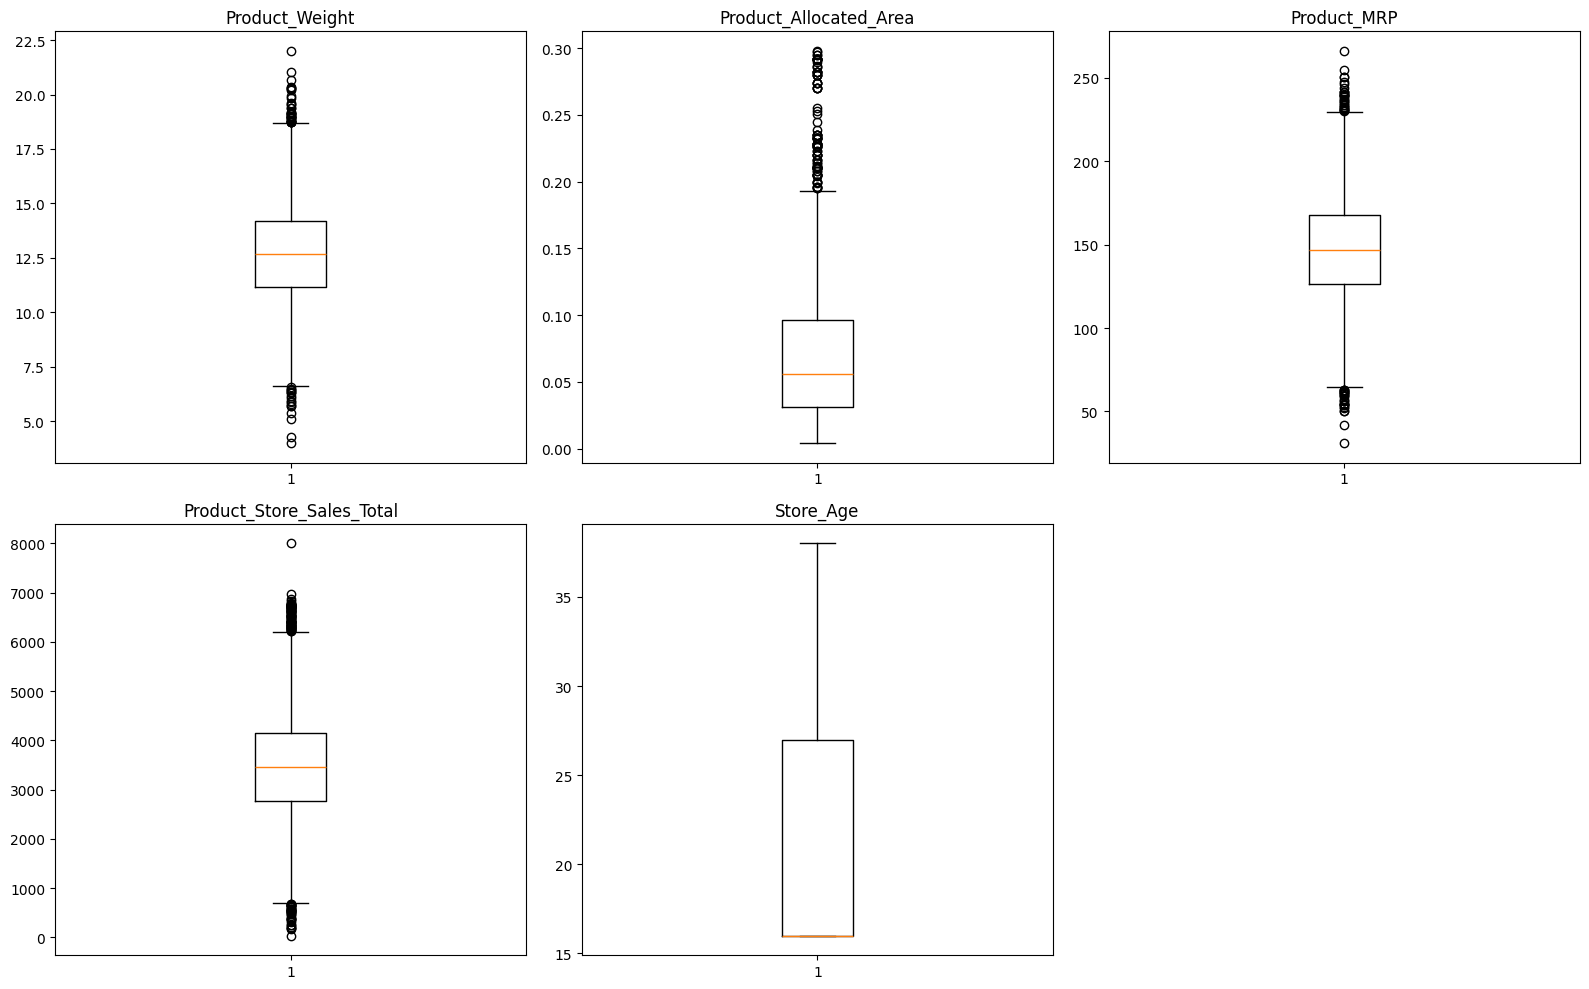

In [ ]:
# Outlier vizualization using boxplot
plt.figure(figsize=(16, 10))

for i, variable in enumerate(num_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
# Identifying Outliers for numeric columns
Q1 = data[num_columns].quantile(0.25)                                 # Calculating the 25th percentile value.
Q3 = data[num_columns].quantile(0.75)                                 # Calculating the 75th percentile value.
IQR = Q3 - Q1                                                         # Calculating the Inter Quantile Range (IQR)
Lower_value = Q1 - 1.5 * IQR                                          # Calculating Value < which is considered an outliers
Upper_value = Q3 + 1.5 * IQR                                          # Calculating Value > which is considered an outliers

In [ ]:
# Printing the percentage of outliers in each Numerical column.
Outlier_percentage = (((data[num_columns] < Lower_value) | (data[num_columns] > Upper_value)).sum() / len(data)) * 100
print(Outlier_percentage)

Product_Weight               0.616227
Product_Allocated_Area       1.186808
Product_MRP                  0.650462
Product_Store_Sales_Total    1.357982
Store_Age                    0.000000
dtype: float64


**Observation**: The Outlier Percentages are **0.61%, 1.2%, 0.65% & 1.35%** for the respective columns as shown above which is very small part of the dataset.

Since there are **very few outliers** and they can contain important other parameters, hence **we will retain them** as part of the dataset.

### 6. Splitting the data to Train & test set

In [ ]:
y = data['Product_Store_Sales_Total']                                            # Initializing the dependent varaible which is Product_Store_Sales_Total
X = data.drop(['Product_Store_Sales_Total'], axis=1)                             # Initializing the independent variables which are everything except Product_Store_Sales_Total

# Splitting the data into train and test sets in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31, shuffle=True)

# Checking the shape of X-train and X-test dataset
X_train.shape, X_test.shape


((6572, 10), (2191, 10))

In [ ]:
# Checking the shape of y-train and y-test dataset
y_train.shape, y_test.shape

((6572,), (2191,))

**Observation**: Dependent & Independent Variables have been defined which have been further divided to Train and Test dataset with the ratio of 75:25.

### 7. Encoding Categorical Values

We have **6 Categorical columns** i.e., 'Product_Sugar_Content', 'Product_Type', 'Store_Size', 'Store_Location_City_Type', 'Store_Type', 'Product_ID_Eng' and these need to be **One hot encoded** for the models to consider these columns.

In [ ]:
# Defining the preprocessing pipeline for encoding categorical features
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_columns)
)

# **Model Building**

## Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

For this problem we will be using **Random Forest** and **XGBoost** techniques

## Random Forest - Model Building

In [ ]:
# Creating an instance of the Random Forest model with training data
rf_model = RandomForestRegressor(random_state=31)                 # Initializing the RF Regressor
rf_model = make_pipeline(preprocessor,rf_model)                   # Creating a pipeline for preprocessing categorical columns and passing data to the RF Regressor
rf_model.fit(X_train, y_train)                                    # Fitting the model with Training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_ID_Eng'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=31))])

In [ ]:
# Checking the performance of the RF model with training data
rf_model_train_perf = model_performance_regression(rf_model, X_train, y_train)
rf_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,608.654822,479.287637,0.675226,0.674731,0.166804


In [ ]:
# Checking the performance of the RF model with test data
rf_model_test_perf = model_performance_regression(rf_model, X_test, y_test)
rf_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,584.82105,462.533686,0.69449,0.693089,0.189547


**Observation**:

*   The Model Performance is **good** with almost **70% Adj R-squared** value in test set.
*   The model is **generalizing very well** with very similar results for both Train and Test data and there **does not** seem to be any **overfitting**.
*   The scores can be **improved with Model Tuning**.



## XGBoost - Model Building

In [ ]:
# Creating an instance of the Random Forest model with training data
xgb_model = XGBRegressor(random_state=31)                 # Initializing the RF Regressor
xgb_model = make_pipeline(preprocessor,xgb_model)                   # Creating a pipeline for preprocessing categorical columns and passing data to the RF Regressor
xgb_model.fit(X_train, y_train)                                    # Fitting the model with Training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_ID_Eng'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_by...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=31, ...))])

In [ ]:
# Checking the performance of the XGBoost model with training data
xgb_model_train_perf = model_performance_regression(xgb_model, X_train, y_train)
xgb_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,608.621884,478.89383,0.675261,0.674766,0.166719


In [ ]:
# Checking the performance of the XGBoost model with test data
xgb_model_test_perf = model_performance_regression(xgb_model, X_test, y_test)
xgb_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,584.977279,462.261584,0.694327,0.692925,0.189478


**Observation**: We are getting almost identical performance scores with XGBoost model as we did for Random Forest model.

*   The Model Performance is **good** with almost **70% Adj R-squared** value in test set.
*   The model is **generalizing very well** with very similar results for both Train and Test data and there **does not** seem to be any **overfitting**.
*   The scores can be **improved with Model Tuning**.

# **Model Performance Improvement - Hyperparameter Tuning**

## Random Forest - Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning for the Random Forest Model
rf_tuned = RandomForestRegressor(random_state=31)
rf_tuned = make_pipeline(preprocessor,rf_tuned)

# Considering several parameters to find the best set of parameters for the model
param_grid = {
    'randomforestregressor__n_estimators': [ 100, 200, 300, 400, 500],
    'randomforestregressor__max_depth': [None, 5, 10, 15],
    'randomforestregressor__min_samples_split': [2, 4, 6, 8],
    'randomforestregressor__min_samples_leaf': [1, 3, 5, 7],
    'randomforestregressor__max_features': ['sqrt', 'log2', 0.5]
}

# Finding the optimal set of parameters using GridSearchCV
grid_search = GridSearchCV(rf_tuned, param_grid, cv=3, scoring=r2_score, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Setting the parameters to the best result obtaining parameters
rf_tuned = grid_search.best_estimator_

# Fitting the train data to the best model
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_ID_Eng'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', random_state=31))])

In [ ]:
# Checking the performance of the RF tuned model with training data
rf_tuned_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,608.654822,479.287637,0.675226,0.674731,0.166804


In [ ]:
# Checking the performance of the RF tuned model with test data
rf_tuned_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
rf_tuned_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,584.82105,462.533686,0.69449,0.693089,0.189547


In [ ]:
# Best Parameters used in the tuned model
grid_search.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 100}

**Observation**:

* Tuning hyperparameters by Optimizing for R2 score and previously adj R2 score we got almost similar performance scores as we got for our original Random Forest model.
* We are getting a root mean squared error of 585 **in test data**, Percentage Error of 19% and Adj R-squared value of 0.69.
* After multiple iterations of parameters we **havent been able to improve model performance by much using Hyperparameter tuning.**




## XGBoost - Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning for the XGBoost Model
xgb_tuned = XGBRegressor(random_state=31)
xgb_tuned = make_pipeline(preprocessor,xgb_tuned)

# Considering several parameters to find the best set of parameters for the model
param_grid_xg = {
    'xgbregressor__n_estimators': [100, 200, 300, 400],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'xgbregressor__max_depth': [3, 5, 7, 10],
    'xgbregressor__subsample': [0.1, 0.2, 0.3, 0.5, 1],
    'xgbregressor__colsample_bytree': [0.3, 0.5, 0.7, 1]
}

# Finding the optimal set of parameters using GridSearchCV
grid_search_xg = GridSearchCV(xgb_tuned, param_grid_xg, cv=3, scoring=r2_score, n_jobs=-1)
grid_search_xg.fit(X_train, y_train)

# Setting the parameters to the best result obtaining parameters
xgb_tuned = grid_search_xg.best_estimator_

# Fitting the train data to the best model
xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_ID_Eng'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_by...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=31, ...))])

In [ ]:
# Checking the performance of the XGBoost tuned model with training data
xgb_tuned_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
xgb_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,736.909953,578.94351,0.523932,0.523207,0.218769


In [ ]:
# Checking the performance of the XGBoost tuned model with test data
xgb_tuned_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
xgb_tuned_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,717.9241,564.240957,0.539599,0.537487,0.253966


In [ ]:
# Best Parameters used in the tuned model
grid_search_xg.best_params_

{'xgbregressor__colsample_bytree': 0.3,
 'xgbregressor__learning_rate': 0.01,
 'xgbregressor__max_depth': 3,
 'xgbregressor__n_estimators': 100,
 'xgbregressor__subsample': 0.1}

**Observation**:

* Tuning hyperparameters by Optimizing for R2 score and previously adj R2 score the model performance scores got poorer.
* We are getting a root mean squared error of 717 **in test data**, Percentage Error of 25% and Adj R-squared value of 0.54.
* After multiple iterations of parameters we **havent been able to improve model performance by using Hyperparameter tuning.**

# **Model Performance Comparison, Final Model Selection, and Serialization**

### Model Performance Comparison

In [ ]:
# Model Performance Comparison for Training Data
model_perf_train = pd.concat([rf_model_train_perf.T, xgb_model_train_perf.T, rf_tuned_train_perf.T, xgb_tuned_train_perf.T], axis=1)
model_perf_train.columns = ['RF', 'XGB', 'RF Tuned', 'XGB Tuned']
model_perf_train

,RF,XGB,RF Tuned,XGB Tuned
RMSE,608.654822,608.621884,608.654822,736.909953
MAE,479.287637,478.893830,479.287637,578.943510
R-squared,0.675226,0.675261,0.675226,0.523932
Adj. R-squared,0.674731,0.674766,0.674731,0.523207
MAPE,0.166804,0.166719,0.166804,0.218769


In [ ]:
# Model Performance Comparison for Test Data
model_perf_test = pd.concat([rf_model_test_perf.T, xgb_model_test_perf.T, rf_tuned_test_perf.T, xgb_tuned_test_perf.T], axis=1)
model_perf_test.columns = ['RF', 'XGB', 'RF Tuned', 'XGB Tuned']
model_perf_test

,RF,XGB,RF Tuned,XGB Tuned
RMSE,584.821050,584.977279,584.821050,717.924100
MAE,462.533686,462.261584,462.533686,564.240957
R-squared,0.694490,0.694327,0.694490,0.539599
Adj. R-squared,0.693089,0.692925,0.693089,0.537487
MAPE,0.189547,0.189478,0.189547,0.253966


In [ ]:
# Diiference between the performance scores of test and train data.
model_perf_test - model_perf_train

,RF,XGB,RF Tuned,XGB Tuned
RMSE,-23.833772,-23.644605,-23.833772,-18.985854
MAE,-16.753950,-16.632246,-16.753950,-14.702553
R-squared,0.019264,0.019066,0.019264,0.015666
Adj. R-squared,0.018358,0.018159,0.018358,0.014280
MAPE,0.022743,0.022759,0.022743,0.035197


### Final Model Selection

**Observation**:

* We do not see much improvement in either model after hyperparameter tuning.
* All models have generalized very well with the models showing better performance on the test datasets.

Hence we can conclude that **Random Forest Tuned model** is the best model as it provides the best results on the test set (same as original RF model) with an Adj R-square value of 0.693 and percentage error of 19%.


### Model Serialization

In [ ]:
# Creating a folder or directory to store the files for Web app deployment
os.makedirs("SuperKart-backend", exist_ok=True)

# Defining the file path to serialize / save the trained model along with dataprocessing steps
SuperKart_path = "SuperKart-backend/Sales-Predictor-v1.joblib"

# Saving the selected model using joblib
joblib.dump(rf_tuned, SuperKart_path)

print("Model has been saved")

Model has been saved


In [ ]:
# Loading the model from the file
model = joblib.load("SuperKart-backend/Sales-Predictor-v1.joblib")

print("Model has been Loaded")

# Showing the model
model

Model has been Loaded


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Product_Type', 'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_ID_Eng'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', random_state=31))])

In [ ]:
# Predicting using the saved model
model.predict(X_test)

array([1822.1438664 , 3281.56952896, 4972.67817224, ..., 3296.61306151,
       3878.74782752, 3897.87586798])

**Observation**: Our Random Forest tuned model has been serialized as a **.joblib file** and it can be retreived as well to make predictions without retraining.

# **Deployment - Backend**

## Flask Web Framework


In [ ]:
%%writefile SuperKart-backend/app.py
# Above command writes the content of this cell to a file named app.py inside the backend_files directory.

# Importing necessary libraries
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify
import joblib
import os # Import the os module

# Initializing Flask App with a name
SuperKartapi = Flask("SuperKart Sales Predictor")

# Loading the saved model from the file
model = joblib.load("Sales-Predictor-v1.joblib")

# Defining a path for going to the home page of the app
@SuperKartapi.route('/')
def home():
    return "Welcome to SuperKart Sales Predictor !"

# We will define an Endpoint to predict Sales for a single product
@SuperKartapi.post('/predictsales')
def predict_sales():
  data = request.get_json()   # Getting a JSON data in response to the request

  # Extracting Relevant Product features from the input data.
  sample = {
      'Product_Weight': data['Product_Weight'],
      'Product_Sugar_Content': data['Product_Sugar_Content'],
      'Product_Allocated_Area': data['Product_Allocated_Area'],
      'Product_Type': data['Product_Type'],
      'Product_MRP': data['Product_MRP'],
      'Store_Size': data['Store_Size'],
      'Store_Location_City_Type': data['Store_Location_City_Type'],
      'Store_Type': data['Store_Type'],
      'Product_ID_Eng': data['Product_ID_Eng'],
      'Store_Age': data['Store_Age']
  }

  # Converting the extracted data into a DataFrame
  input_data = pd.DataFrame([sample])

  # Making a prediction using the selected model
  prediction = model.predict(input_data).tolist()[0]

  # Returning the prediction as a JSON response
  return jsonify({'Sales': prediction})

# Running the Flask app
if __name__ == '__main__':
    SuperKartapi.run(debug=True)

Overwriting SuperKart-backend/app.py


## Dependencies File

In [ ]:
%%writefile SuperKart-backend/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

Overwriting SuperKart-backend/requirements.txt


## Dockerfile

In [ ]:
%%writefile SuperKart-backend/Dockerfile
FROM python:3.9-slim

# Setting the working directory inside the container
WORKDIR /app

# Copying all files from the current directory on the host to the container's /app directory
COPY . .

# Installing dependencies from the requirements file without using cache to reduce image size and make our environment light weight as it doesnt store cache
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Defining the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:SuperKartapi"]



Overwriting SuperKart-backend/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [ ]:
# Importing the login function from the huggingface_hub library
from huggingface_hub import login

# We need to login to Hugging Face account using access token and replace "HUGGINGFACE_TOKEN" with our actual token
# We can get our token from https://huggingface.co/settings/tokens
login(token="hf_mLjSgoAiZyApIiBSSnZHZDmyDElUbbXbg")

# Importing the created_repo function from the huggingface_hub library
from huggingface_hub import create_repo

In [ ]:
# Trying to create the repository for the Hugging Face Space
try:
    create_repo("Backend-SuperKart",  # Define the name of the repository
        repo_type="space",  # Specifying the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker"
        private=False  # To be set to True if we want the space to be private
    )
except Exception as e:
    # Handles potential errors during repository creation if repository already exists
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-68a2a2bf-7de57b120ce128a01de0400a;8e77c2ca-ac80-4179-8e5d-c38db50613cf)

You already created this space repo


## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
access_key = "hf_mLjSgoAiZyApIiBSSnZHZDmyDElUbbXbg"  # Hugging Face write token mentioned above
repo_id = "shreek04/Backend-SuperKart"                # Adding the "User name / Space or repository name"
login(token=access_key)                               # Logging in to Hugging Face account
api = HfApi()                                         # Initializing the HfApi object to interact with the Hugging Face API

# Uploading the Streamlit app files stored in the SuperKart-backend
api.upload_folder(
    folder_path="SuperKart-backend",
    repo_id=repo_id,
    repo_type="space"
)

Uploading...:   0%|          | 0.00/431k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/shreek04/Backend-SuperKart/commit/4ddeec86816c2875e0e6468eb5a91bbb8d781780', commit_message='Upload folder using huggingface_hub', commit_description='', oid='4ddeec86816c2875e0e6468eb5a91bbb8d781780', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/shreek04/Backend-SuperKart', endpoint='https://huggingface.co', repo_type='space', repo_id='shreek04/Backend-SuperKart'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [ ]:
# Creating a folder or directory to store the files for frontend UI deployment
os.makedirs("SuperKart_frontend_files", exist_ok=True)

In [ ]:
%%writefile SuperKart_frontend_files/app.py
# Importing necessary libraries
import requests
import streamlit as st
import pandas as pd

st.title("SuperKart Sales Predictor FE")   # Defining the title of the app

# Defining the types of Input fields for the model
Product_Weight = st.number_input("Product Weight", min_value = 0.0, max_value = 25.0)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = st.number_input("Product Allocated Area", min_value = 0.0, max_value = 0.5)
Product_Type = st.selectbox("Product Type", ["Non-Perishable", "Perishable"])
Product_MRP = st.number_input("Product MRP", min_value = 0.0, max_value = 1000.0)
Store_Size = st.selectbox("Store Size", ["High", "Medium", "Small"])
Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"])
Store_Type = st.selectbox("Store Type", ["Supermarket Type1", "Supermarket Type2", "Departmental Store", "Food Mart"])
Product_ID_Eng = st.selectbox("Product ID Engineering", ["DR", "FD", "NC"])
Store_Age = st.number_input("Store_Age", min_value = 1, max_value = 50)

Input_Data = {
      'Product_Weight': Product_Weight,
      'Product_Sugar_Content': Product_Sugar_Content,
      'Product_Allocated_Area': Product_Allocated_Area,
      'Product_Type': Product_Type,
      'Product_MRP': Product_MRP,
      'Store_Size': Store_Size,
      'Store_Location_City_Type': Store_Location_City_Type,
      'Store_Type': Store_Type,
      'Product_ID_Eng': Product_ID_Eng,
      'Store_Age': Store_Age
}

# Running the Endpoint to get a prediction from the backend
if st.button("Predict", type='primary'):
    response = requests.post("https://shreek04-Backend-SuperKart.hf.space/predictsales", json= Input_Data)
    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ${predicted_sales:.2f}")
    else:
        st.error("Error in API request")

Overwriting SuperKart_frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile SuperKart_frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Overwriting SuperKart_frontend_files/requirements.txt


## DockerFile

In [ ]:
%%writefile SuperKart_frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting SuperKart_frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = "hf_mLjSgoAiZyApIiBSSnZHZDmyDElUbbXbg"      # Hugging Face write token mentioned above
repo_id = "shreek04/SuperKart-Sales-Predictor-Frontend"   # Adding the "User name / Space or repository name"
login(token=access_key)                                   # Logging in to Hugging Face account
api = HfApi()                                             # Initializing the HfApi object to interact with the Hugging Face API

# Uploading the Streamlit app files stored in the SuperKart_frontend_files
api.upload_folder(
    folder_path="SuperKart_frontend_files",
    repo_id=repo_id,
    repo_type="space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/shreek04/SuperKart-Sales-Predictor-Frontend/commit/cba2ec0ac1d07475ba2675c6990fc540e2f8c618', commit_message='Upload folder using huggingface_hub', commit_description='', oid='cba2ec0ac1d07475ba2675c6990fc540e2f8c618', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/shreek04/SuperKart-Sales-Predictor-Frontend', endpoint='https://huggingface.co', repo_type='space', repo_id='shreek04/SuperKart-Sales-Predictor-Frontend'), pr_revision=None, pr_num=None)

# **Result Screenshots for Frontend & Backend**

## Backend Result:

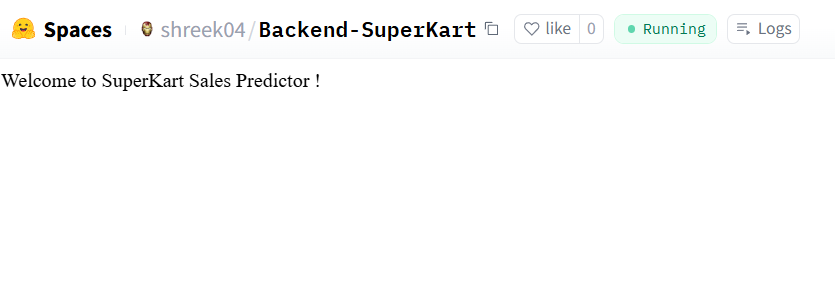

## Frontend Result:

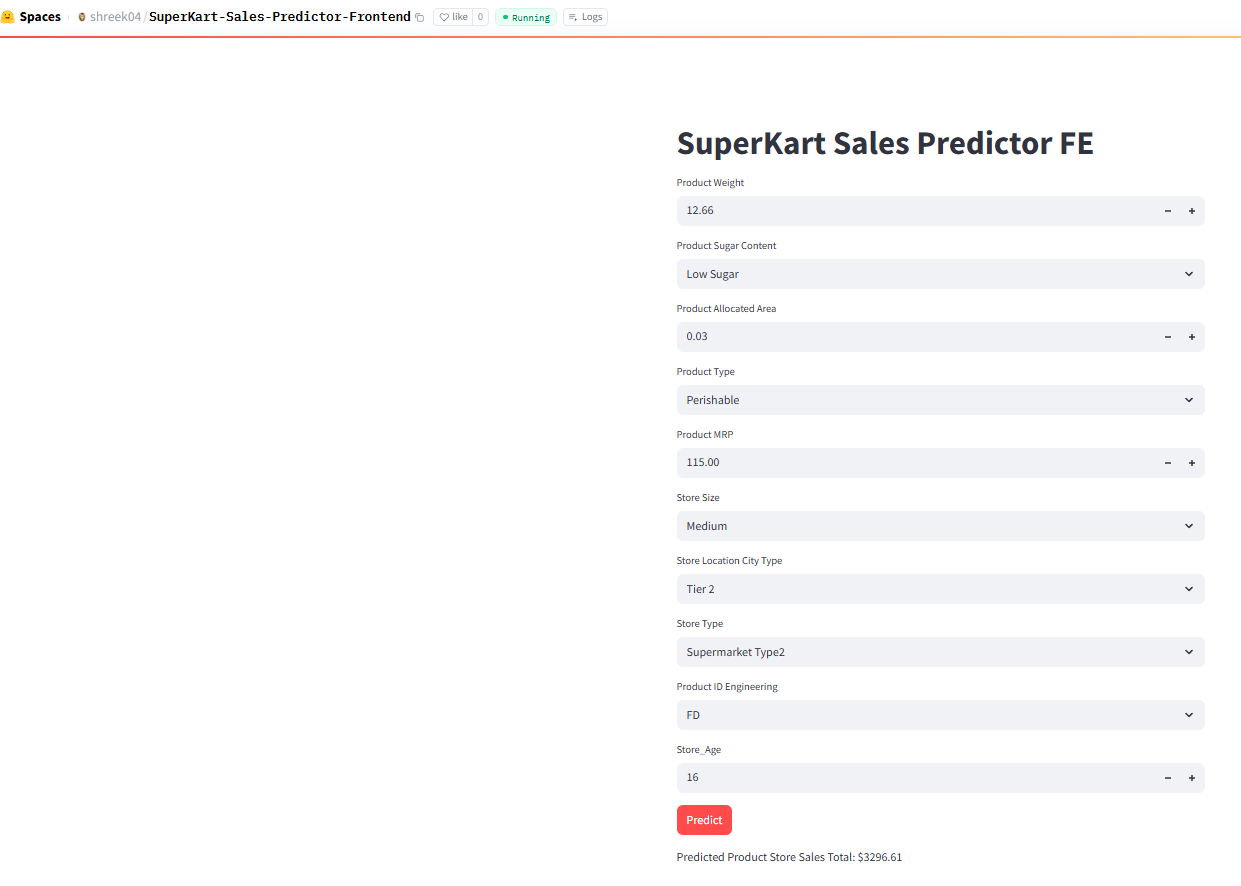

# **Actionable Insights and Business Recommendations**

- In this project, for the given dataset we did Data Processing to give better results like correcting the data in the Product Sugar Content Column, Feature Enngineering for the Product ID column, Replacing Store established with Store Age and grouping data to Perishables & Non-Perishables.

- Of the models we trained we selected Random Forest tuned model which gave an adjusted R-squared value of 0.69 on the test data and Mean percentage error of ~19% and went for model deployment.

- The deployed backend is a FastAPI application accessible via a public IP address and the backend has a single endpoint, `/predict`, which accepts POST requests.

- The `/predict` endpoint expects a JSON payload and the the backend returns a JSON response with a single key, `Sales`, containing the predicted product store sales value.

- Due to Frontend and Backend being decoupled we can use the backend for other applications, systems and purposes allowing for higher flexibility.

- In terms of the current dataset, more data lines would help the models train better and give more accurate results.

- Also, a column on data timeline would help i.e., whether the data is quarterly or yearly so that predictions can be defined as Product Sales for the next quarter / year.

- In terms of training the data, keeping the Product Type column as it was (16 categories) instead of 'Perishable' & 'Non-Perishable' might have helped in better training. However, it would have added a lot of computation cost for training the model.